# Convolutional Neural Networks and Computer Vision with TensorFlow

Now we're going to get specific and see how a special kind o neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

For example, you might want to:
+ Classify whether a picture of food contains pizza or steak.
+ Detect whether or not an object appears in an image (e.g. did a specific car pass through a securtiy camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

---
# What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

+ Getting a dataset to work with

+ Architecture of a convolutional neural network

+ A quick ent-to-end example (what we're working towards)

+ Steps in modelling for binary image classification with CNNs
    
    + Becoming one with the data
    
    + Preparing data for modelling
    
    + Creating a CNN model (starting with a baseline)
    
    + Fitting a model (getting it to find patterns in our data)
    
    + Evaluating a model
    
    + Improving a model
    
    + Making a prediction with a trained model
    
+ Steps in modelling for multi-class image classification with CNNs

+ Same as above (but this time with a different dataset)

---
# Get the data

Because convoutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza and steak and build a binary classifier.

We'll download the pizza_steak subset .zip file and unzip it.

In [3]:
import zipfile

# download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-14 09:36:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.181.240, 172.217.18.112, 172.217.16.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.181.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip'

     0K .......... .......... .......... .......... ..........  0%  387K 4m36s
    50K .......... .......... .......... .......... ..........  0%  744K 3m30s
   100K .......... .......... .......... .......... ..........  0%  873K 3m1s
   150K .......... .......... .......... .......... ..........  0% 1,01M 2m41s
   200K .......... .......... .......... .......... ..........  0% 1,68M 2m21s
   250K .......... .......... .......... .......... ..........  0% 48,5M 1m58s
   300K .......... .......... .......... .......... ..........  0% 1005K 1m56s
   350K .......... 

---
# Inspect the data (become one with it)

This usually means plent of visualizing and folder scanning to understand the data you're working with.

With this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
+ A 'train' directory which contains all of the images in the training dataset with subdirectories each named after a certain class containin images of that class.
+ A 'test' directory with the same structure as the 'train' directory.

In [4]:
'''
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...

'''

'\nExample of file structure\n\npizza_steak <- top level folder\n└───train <- training images\n│   └───pizza\n│   │   │   1008104.jpg\n│   │   │   1638227.jpg\n│   │   │   ...      \n│   └───steak\n│       │   1000205.jpg\n│       │   1647351.jpg\n│       │   ...\n│   \n└───test <- testing images\n│   └───pizza\n│   │   │   1001116.jpg\n│   │   │   1507019.jpg\n│   │   │   ...      \n│   └───steak\n│       │   100274.jpg\n│       │   1653815.jpg\n│       │   ...\n\n'

Let's inspect each of the directories we've downloaded.

To so do, we can use the command 'ls' which stands for 'list'. (in linux)

We can use the command 'dir' in windows.

In [1]:
!dir pizza_steak

 Volume in drive D is Yeni Birim
 Volume Serial Number is 4471-82E4

 Directory of d:\programs\Microsoft VS Code Projects\internship\tensorflow\pizza_steak

14.07.2023  09:36    <DIR>          .
14.07.2023  09:36    <DIR>          ..
14.07.2023  09:36    <DIR>          test
14.07.2023  09:36    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  370.828.820.480 bytes free


We can see we've got a 'train' and 'test' folder.

Let's see what's inside of them.

In [2]:
!dir pizza_steak\train
    
# !ls pizza_steak/train/ (in linux)

 Volume in drive D is Yeni Birim
 Volume Serial Number is 4471-82E4

 Directory of d:\programs\Microsoft VS Code Projects\internship\tensorflow\pizza_steak\train

14.07.2023  09:36    <DIR>          .
14.07.2023  09:36    <DIR>          ..
14.07.2023  09:36    <DIR>          pizza
14.07.2023  09:36    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  370.828.820.480 bytes free


And how about inside the 'steak' directory?

In [3]:
!dir pizza_steak\train\steak

 Volume in drive D is Yeni Birim
 Volume Serial Number is 4471-82E4

 Directory of d:\programs\Microsoft VS Code Projects\internship\tensorflow\pizza_steak\train\steak

14.07.2023  09:36    <DIR>          .
14.07.2023  09:36    <DIR>          ..
14.07.2023  09:36            36.185 1000205.jpg
14.07.2023  09:36            34.497 100135.jpg
14.07.2023  09:36           116.802 101312.jpg
14.07.2023  09:36            56.754 1021458.jpg
14.07.2023  09:36            34.143 1032846.jpg
14.07.2023  09:36            24.688 10380.jpg
14.07.2023  09:36            37.134 1049459.jpg
14.07.2023  09:36            49.841 1053665.jpg
14.07.2023  09:36            59.983 1068516.jpg
14.07.2023  09:36            28.996 1068975.jpg
14.07.2023  09:36            29.525 1081258.jpg
14.07.2023  09:36            49.577 1090122.jpg
14.07.2023  09:36            59.976 1093966.jpg
14.07.2023  09:36            60.253 1098844.jpg
14.07.2023  09:36            69.843 1100074.jpg
14.07.2023  09:36            45.470 11

A whole bunch of images. But how many?

In [4]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [5]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [6]:
# get the class names (programmatically, this is much more helpful with a longer list of classes)

import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/') # turn our training path to python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


So we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

**visualize, visualize, visualize**

In [7]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # setup target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0]) # show the shape of the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    
    print(f'image shape: {img.shape}') # show the shape of image
    
    return img

image shape: (512, 512, 3)


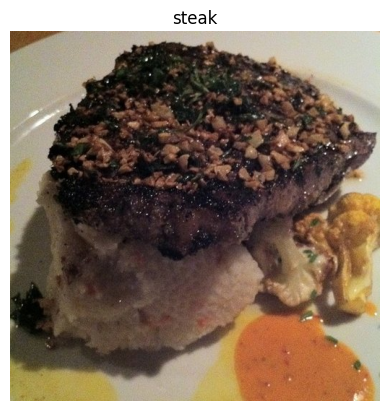

In [8]:
# view a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor)

In [9]:
# view the img (actually just a big array/tensor)
img

array([[[104,  69,  37],
        [118,  83,  51],
        [114,  79,  47],
        ...,
        [211, 194, 166],
        [202, 183, 153],
        [191, 172, 142]],

       [[112,  77,  45],
        [112,  77,  45],
        [104,  69,  37],
        ...,
        [217, 201, 175],
        [211, 194, 166],
        [202, 185, 157]],

       [[118,  82,  50],
        [110,  74,  42],
        [106,  70,  38],
        ...,
        [225, 211, 185],
        [223, 207, 182],
        [219, 203, 178]],

       ...,

       [[173, 166, 114],
        [163, 156, 102],
        [163, 156, 101],
        ...,
        [187, 187, 151],
        [189, 189, 155],
        [189, 189, 155]],

       [[179, 173, 123],
        [170, 164, 112],
        [164, 159, 104],
        ...,
        [181, 181, 145],
        [181, 181, 147],
        [185, 185, 151]],

       [[174, 168, 118],
        [170, 164, 112],
        [159, 154,  99],
        ...,
        [183, 183, 147],
        [184, 184, 150],
        [190, 190, 156]]

In [10]:
# view the image shape
img.shape # width, height, color channels

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (width, height, color channels).

You'll notice all of the values in the 'img' array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [11]:
# get all the pixel values between 0 % 1 (normalize)
img/255.

array([[[0.40784314, 0.27058824, 0.14509804],
        [0.4627451 , 0.3254902 , 0.2       ],
        [0.44705882, 0.30980392, 0.18431373],
        ...,
        [0.82745098, 0.76078431, 0.65098039],
        [0.79215686, 0.71764706, 0.6       ],
        [0.74901961, 0.6745098 , 0.55686275]],

       [[0.43921569, 0.30196078, 0.17647059],
        [0.43921569, 0.30196078, 0.17647059],
        [0.40784314, 0.27058824, 0.14509804],
        ...,
        [0.85098039, 0.78823529, 0.68627451],
        [0.82745098, 0.76078431, 0.65098039],
        [0.79215686, 0.7254902 , 0.61568627]],

       [[0.4627451 , 0.32156863, 0.19607843],
        [0.43137255, 0.29019608, 0.16470588],
        [0.41568627, 0.2745098 , 0.14901961],
        ...,
        [0.88235294, 0.82745098, 0.7254902 ],
        [0.8745098 , 0.81176471, 0.71372549],
        [0.85882353, 0.79607843, 0.69803922]],

       ...,

       [[0.67843137, 0.65098039, 0.44705882],
        [0.63921569, 0.61176471, 0.4       ],
        [0.63921569, 0

---
# A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

**Input images(s):** Target images you'd like to discover patterns in

**Input layer:** Takes in target images and preprocesses them for further layers.

**Convolutional layer:** Extracts/learns the most important features from target images.

**Hidden activation:** Adds non-linearity to learned features

**Pooling layer:** Reduces the dimensionality of learned image features

**Fullt connected layer:** Further refines learned features from convolutional layers

**Output layer:** Takes learned features and outputs them in shape of target labels.

**Output activation:** Adds non-linearities to output layer.

How they stack together:

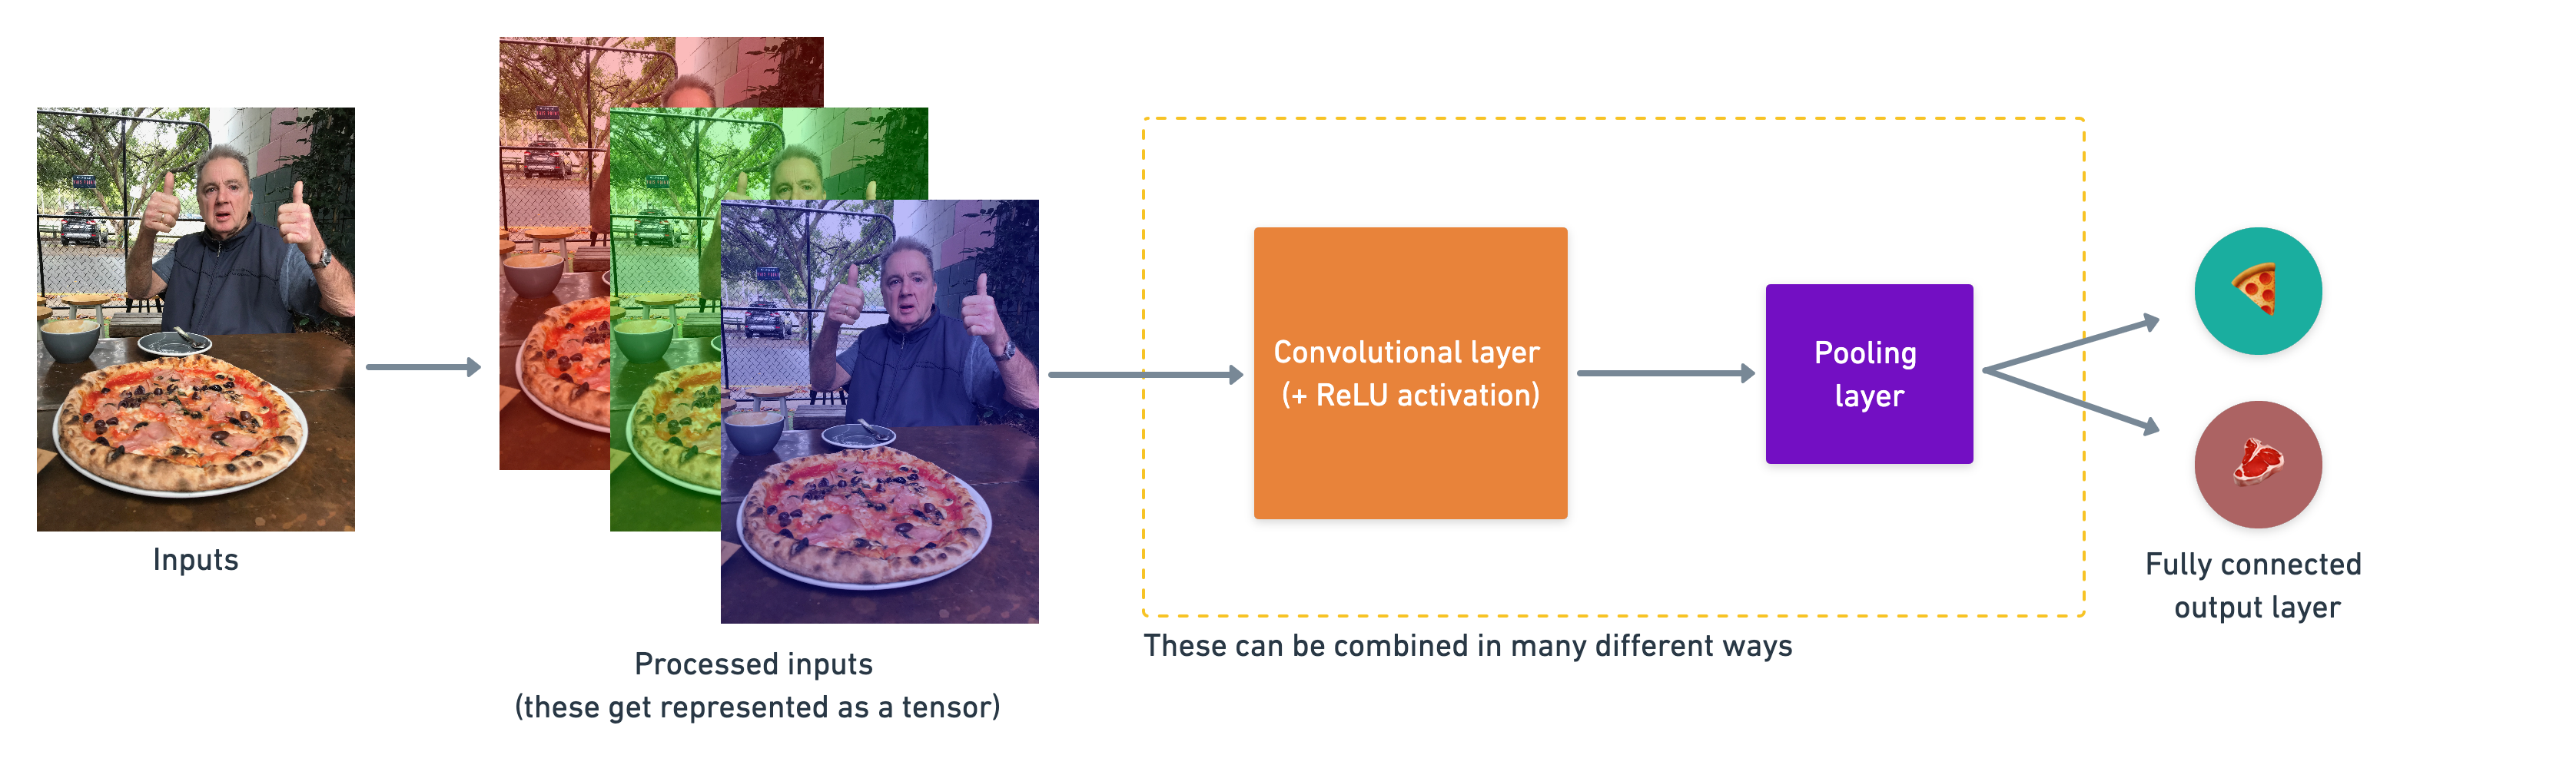